<a href="https://colab.research.google.com/github/Tanulshn/Python-and-DS-work/blob/main/End_to_End_TSA_Quantra_file.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Packages Imported

- import pandas as pd 
- import numpy as np
- import seaborn as sns - For graphs
- import pylab

Import matplotlib and set the style
- import matplotlib.pyplot as plt
- import matplotlib.dates as mdates
- %matplotlib inline
- plt.style.use('seaborn-darkgrid')

For warnings (to be ignored)
- import warnings
- warnings.simplefilter(action='ignore')


For Standrdisation (mean=0, std=1)
- from sklearn.preprocessing import StandardScaler

For Dickey Fuller test (Stationarity)
- from statsmodels.tsa.stattools import adfuller
OR
- import statsmodels.tsa.stattools as sts
- sts.adfuller(----)

For Decomposition
- import statsmodels.tsa.seasonal as sts
- from statsmodels.tsa.seasonal import seasonal_decompose

For Autcorrelation check (ACF and PACF)
- import statsmodels.graphics.tsaplots as sgt
- Call plot_acf for Auto Correlation Function

For Autoregressive Model
- from statsmodels.tsa.ar_model import AR

For calculating the efficiency of AR model
- from sklearn.metrics import mean_squared_error

For Calculating the intervals: Moving average visualisation
- from sklearn.metrics import mean_absolute_error

For ARIMA 
- from statsmodel.tsa.arima_model import ARIMA

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import pylab

import matplotlib.dates as mdates
%matplotlib inline
plt.style.use('seaborn-darkgrid')

In [2]:
import warnings
warnings.simplefilter(action='ignore')

# Data Preprocessing

In [3]:
raw_data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Time Series Analysis/Britannia/Britannia data.csv')
raw_data

,Date,Value,Mcap
0,2/4/2007,27.61,29.03
1,3/4/2007,27.86,29.29
2,4/4/2007,27.73,29.15
3,5/4/2007,28.02,29.46
4,6/4/2007,No Data FOund,No Data FOund
...,...,...,...
5171,29-05-2021,No Data FOund,No Data FOund
5172,30-05-2021,No Data FOund,No Data FOund
5173,31-05-2021,44.55,830.44
5174,1/6/2021,44.56,830.65


In [4]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5176 entries, 0 to 5175
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Date    5176 non-null   object
 1   Value   5176 non-null   object
 2   Mcap    5176 non-null   object
dtypes: object(3)
memory usage: 121.4+ KB


In [5]:
df= raw_data.copy()

In [6]:
# Change the dtypes by pd.to_numeric() function

for i in ['Value','Mcap']:
  df[i] = pd.to_numeric(raw_data[i], errors= 'coerce')

print(df.info(), raw_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5176 entries, 0 to 5175
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    5176 non-null   object 
 1   Value   3509 non-null   float64
 2   Mcap    3509 non-null   float64
dtypes: float64(2), object(1)
memory usage: 121.4+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5176 entries, 0 to 5175
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Date    5176 non-null   object
 1   Value   5176 non-null   object
 2   Mcap    5176 non-null   object
dtypes: object(3)
memory usage: 121.4+ KB
None None


In [7]:
df.head()

,Date,Value,Mcap
0,2/4/2007,27.61,29.03
1,3/4/2007,27.86,29.29
2,4/4/2007,27.73,29.15
3,5/4/2007,28.02,29.46
4,6/4/2007,NaN,NaN


### Datetime formatting 

In [8]:
df['Date'] = pd.to_datetime(df['Date'], dayfirst= True)
df.set_index('Date', inplace=True)
df.head()

,Value,Mcap
Date,,
2007-04-02,27.61,29.03
2007-04-03,27.86,29.29
2007-04-04,27.73,29.15
2007-04-05,28.02,29.46
2007-04-06,NaN,NaN


In [9]:
# Monthly time series
df = df.resample('m').last()
df.head()

,Value,Mcap
Date,,
2007-04-30,28.69,30.17
2007-05-31,34.69,36.47
2007-06-30,35.79,37.62
2007-07-31,38.73,40.72
2007-08-31,35.59,37.42


In [10]:
df.shape

(171, 2)

In [11]:
df.isnull().sum()

Value    0
Mcap     0
dtype: int64

No missing values, hence no treatment required

# Primary test for Stationarity: Dicky Fuller test

4 properties of for a series to be stationary:
1. Constant Mean
2. Constant Variance
3. Constant Autocorrelation structure
4. No periodic component

In [12]:
# Import packages for stationarity test

import statsmodels.tsa.stattools as sts
from statsmodels.tsa.stattools import adfuller

In [13]:
# # Do it manually
# adfuller(df['Value'])

In [14]:
# Do it logicwise for proper presentation

# H0 = Data is not stationary
# Ha = Data is stationary

def adfuller_test(Input):
  result = adfuller(Input)
  labels = ['ADF Test Stat', 'p-value', '# Lags used','# observations used']
  for value,label in zip(result,labels):
    print(label, ' : ', str(value))

  if result[1] <= 0.05:
    print('Outcome: Strong evidence against the null hypothesis; reject H0; data has no unit root; DATA IS STATIONARY.')
  else:
    print('Outcome: Weak evidence against H0; accept H0, DATA IS NOT STATIONARY') 

In [15]:
for i in ['Value', 'Mcap',]:
  print('For: ', i,' Variable', '\n')
  print(adfuller_test(df[i]))
  print('\n')

For:  Value  Variable 

ADF Test Stat  :  -1.8758165091517969
p-value  :  0.343521894883849
# Lags used  :  0
# observations used  :  170
Outcome: Weak evidence against H0; accept H0, DATA IS NOT STATIONARY
None


For:  Mcap  Variable 

ADF Test Stat  :  0.7285083819540444
p-value  :  0.9903899647809903
# Lags used  :  12
# observations used  :  158
Outcome: Weak evidence against H0; accept H0, DATA IS NOT STATIONARY
None




As per Dicky Fuller test, non of the series (or variables) display stationarity.

We, then perform differencing to induce stationarty and check whether the series have become stationary.

Note: This step is only done for visualisation. For modeling, original (non stationary) series will only be used (ARIMA model)

In [16]:
#df['MC%Change'] = df['Mcap'].pct_change(1)
#df['V%Change'] = df['Value'].pct_change(1)
#df= df[1:]
df.head()

,Value,Mcap
Date,,
2007-04-30,28.69,30.17
2007-05-31,34.69,36.47
2007-06-30,35.79,37.62
2007-07-31,38.73,40.72
2007-08-31,35.59,37.42


## Differencing for treating Stationarity

In [17]:
df_diff= df.copy()

In [18]:
df.head()

,Value,Mcap
Date,,
2007-04-30,28.69,30.17
2007-05-31,34.69,36.47
2007-06-30,35.79,37.62
2007-07-31,38.73,40.72
2007-08-31,35.59,37.42


In [19]:
for i in ['Value','Mcap']:
  df_diff[i] = df[i].diff(1)

df_diff = df_diff[1:]
df_diff.tail()

,Value,Mcap
Date,,
2021-02-28,-1.78,-33.53
2021-03-31,3.66,63.71
2021-04-30,-2.32,-43.18
2021-05-31,-0.02,-0.27
2021-06-30,0.35,6.53


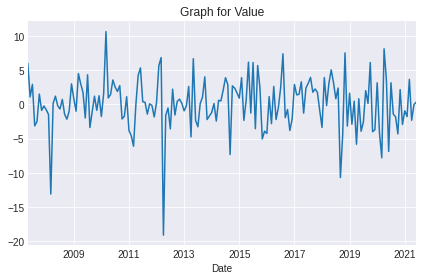

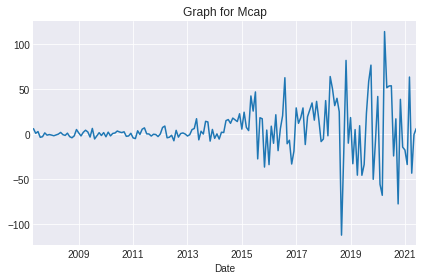

In [21]:
for col,i in enumerate(['Value','Mcap']):
  #print(i,col)
  plt.figure(col)
  df_diff[i].plot()
  plt.title('Graph for {}'.format(i))
  plt.tight_layout()
  plt.show()

In [22]:
#Check for Stationarity to verify if diferencing has trated non stationarity
for i in ['Value','Mcap']:
  print('For: ', i,' Variable', '\n')
  print(adfuller_test(df_diff[i]))
  """
  Checking the stationarity in differenced data
  """
  print('\n')

For:  Value  Variable 

ADF Test Stat  :  -13.783852717786429
p-value  :  9.189731521172569e-26
# Lags used  :  0
# observations used  :  169
Outcome: Strong evidence against the null hypothesis; reject H0; data has no unit root; DATA IS STATIONARY.
None


For:  Mcap  Variable 

ADF Test Stat  :  -3.8617788977608556
p-value  :  0.002334850680017904
# Lags used  :  11
# observations used  :  158
Outcome: Strong evidence against the null hypothesis; reject H0; data has no unit root; DATA IS STATIONARY.
None




From now on, we will use seperate df for each model implementation

# Decomposing the Stationary Variables
- Trend, Seasonal and Residual

In [23]:
# Import the package
import statsmodels.tsa.seasonal as sts
from statsmodels.tsa.seasonal import seasonal_decompose

### Additive Decomposition

In [24]:
# Additive Decomposition

decompose_add = sts.seasonal_decompose(df['Value'], model= 'additive')

In [25]:
add_trend = decompose_add.trend
add_seasonal = decompose_add.seasonal
add_resid = decompose_add.resid

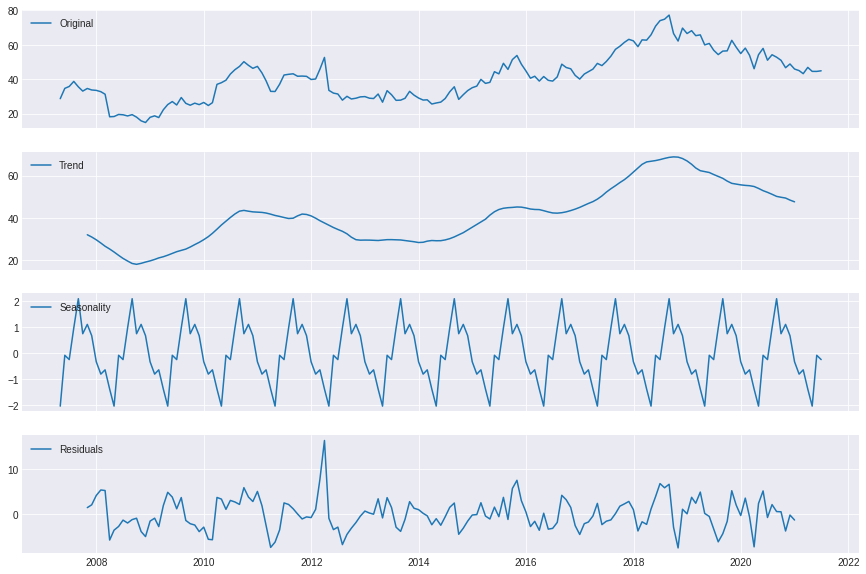

In [26]:
fig, axes = plt.subplots(4, 1, sharex=True, sharey=False)
fig.set_figheight(10)
fig.set_figwidth(15)

axes[0].plot(df['Value'], label='Original')
axes[0].legend(loc='upper left');

axes[1].plot(add_trend, label='Trend')
axes[1].legend(loc='upper left');

axes[2].plot(add_seasonal, label='Seasonality')
axes[2].legend(loc='upper left');

axes[3].plot(add_resid, label='Residuals')
axes[3].legend(loc='upper left');

In [27]:
# Create a seperate series for residual 
add_resid.dropna(0)

Date
2007-10-31    1.395678
2007-11-30    2.026273
2007-12-31    4.117910
2008-01-31    5.345692
2008-02-29    5.222295
                ...   
2020-08-31    0.517583
2020-09-30    0.468577
2020-10-31   -3.829322
2020-11-30   -0.262060
2020-12-31   -1.374173
Freq: M, Name: Value, Length: 159, dtype: float64

In [28]:
resid = pd.DataFrame(add_resid.dropna())
resid.head()

,Value
Date,
2007-10-31,1.395678
2007-11-30,2.026273
2007-12-31,4.117910
2008-01-31,5.345692
2008-02-29,5.222295


In [29]:
if  adfuller(resid['Value'])[1]>0.05:
  print('The p-value is: ',adfuller(resid['Value'])[1], '. Hence, the data is NON STATIONARY')
else:
  print('The p-value is: ',adfuller(resid['Value'])[1], '. Hence, the data is STATIONARY')


The p-value is:  5.45327846973433e-08 . Hence, the data is STATIONARY


Lesson learnt: Having decomposed a non stationary data gives a residual which  is stationary

# AutoCorrelation Check (ACF/ PACF)

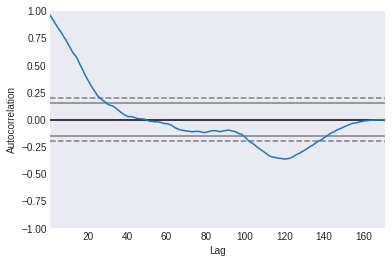

In [31]:
from pandas.plotting import autocorrelation_plot
autocorrelation_plot(df['Value'])
plt.show()

In [32]:
import statsmodels.graphics.tsaplots as sgt

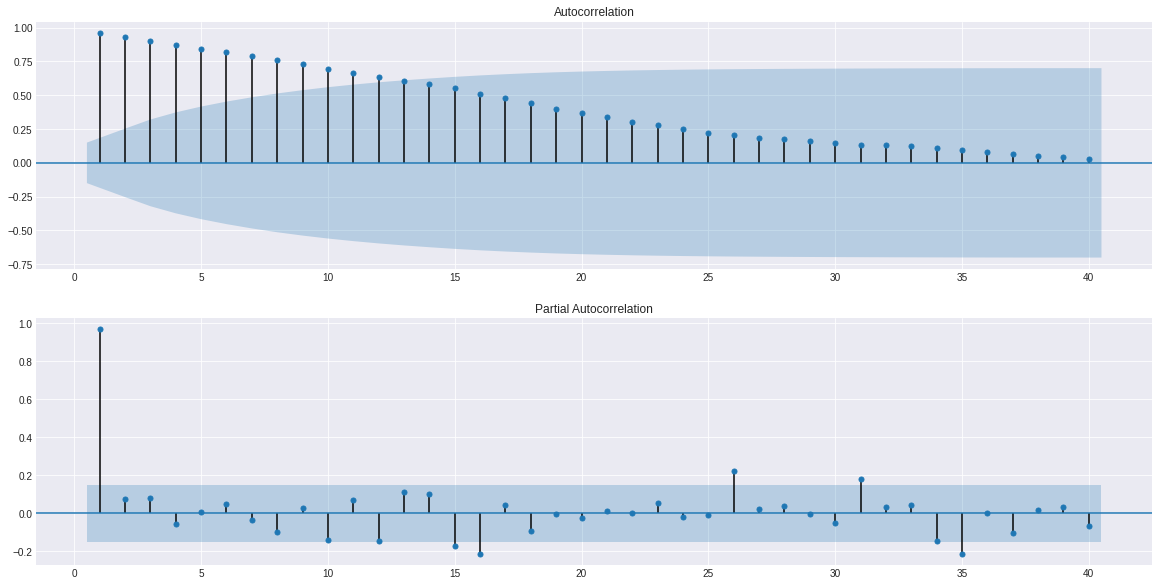

In [34]:
fig = plt.figure(figsize=(20,10))
ax1 = fig.add_subplot(211)
fig = sgt.plot_acf(df['Value'],lags = 40, ax= ax1, zero= False) 

ax2 = fig.add_subplot(212)
fig = sgt.plot_pacf(df['Value'],lags = 40, ax= ax2, zero= False) 


- The ACF is significant till 12th lag
- The PACF is significant till the 96th lag and few beyond 100th lag too 

# Model: AR (Auto-Regressive)
To determine the optimal no of lags used for Autoregression, we must calculate MSE for lags, and choose o of lags. 
Keep in mind to keep the model lees complex.


### AR (1): Using ARIMA model with d=0.

Lets create a copy of df as df_AR 
For Regression, Let us model Mcap variable for the sake of learning

In [35]:
from statsmodels.tsa.ar_model import AR
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

from statsmodels.tsa.arima_model import ARIMA

In [36]:
df.head()

,Value,Mcap
Date,,
2007-04-30,28.69,30.17
2007-05-31,34.69,36.47
2007-06-30,35.79,37.62
2007-07-31,38.73,40.72
2007-08-31,35.59,37.42


In [37]:
# Create a copy of df
df_AR = df.copy()

# define a limit for differntiating train and test as train_test_window
train_test_window = int(len(df)*.75)

# Fit the model as model_AR
""" Fitting the ARIMA model with d =0"""
# Define model
model_AR = ARIMA(df['Mcap'][:train_test_window], (1,0,0))
# Fit the model
model_AR = model_AR.fit()

# Model parameters
model_AR.params

const         288.933695
ar.L1.Mcap      0.998488
dtype: float64

#### Define a function for AR model prediction: We are taking 1 lag: AR(1) model 

In [38]:
# Lets create a function to predict the price of 1 day

def predict_price_AR(train_data,lag):
  """ The function will use ARIM model to predict price of 1 day"""
  # Define model
  model = ARIMA(train_data, order = (lag,0,0))

  # Fit the model
  model_fit = model.fit()#(disp=0)

  # Make Forecast
  forecast = model_fit.forecast()

  return forecast[0][0]

In [39]:
# predict the price
# The prediction will be done via a rolling function
# giving the size of train data as train_test_window
# and apply the predict_price_AR function to the rolling expression


df_AR['Pred'] = df_AR['Mcap'].rolling(train_test_window).apply(predict_price_AR, args=(1,)).round(2)

df_AR['Pred'] = df_AR['Pred'].shift(1)

/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:492: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:492: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:492: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)


In [40]:
df_AR.tail()

,Value,Mcap,Pred
Date,,,
2021-02-28,43.23,810.18,842.33
2021-03-31,46.89,873.89,808.74
2021-04-30,44.57,830.71,872.48
2021-05-31,44.55,830.44,829.22
2021-06-30,44.90,836.97,828.96


In [41]:
print(df_AR.tail(), '\n\n', df.tail())

            Value    Mcap    Pred
Date                             
2021-02-28  43.23  810.18  842.33
2021-03-31  46.89  873.89  808.74
2021-04-30  44.57  830.71  872.48
2021-05-31  44.55  830.44  829.22
2021-06-30  44.90  836.97  828.96 

             Value    Mcap
Date                     
2021-02-28  43.23  810.18
2021-03-31  46.89  873.89
2021-04-30  44.57  830.71
2021-05-31  44.55  830.44
2021-06-30  44.90  836.97


#### Evaluate the Model performance

 Define a function `model_performance` that will take two parameters - `observed` and `predicted`. Based on these two parameters the function will display the error metrics, residual plot and PACF plot.

In [42]:
def model_performance(actual, predicted):
  """ This function will print the MAE, MSE, RMSE and Mean Absolute percentage error (MAPE)
  This will also plot PACF an residual plot"""

  #Mean Absolute error
  mae = mean_absolute_error(actual, predicted).round(2)
  print('The Mean Absolute Error is: ', mae)
  
  #Mean Squared Error 
  mse = mean_squared_error(actual, predicted).round(2)
  print('The Mean Squared Error is: ', mse)

  # Root Mean Squared Error
  rmse = np.sqrt(mse).round(2)
  print('The RMSE is: ', rmse )

  # Mean Absolute percentage error
  mape = 100*((actual-predicted)/actual).abs().mean()
  print('The Mean Absolute Error percentage is: ', mape)

  # Residuals
  residuals = actual- predicted
  labels = actual.index
  #fig,(ax1,ax2) = plt.subplot(2,1, figsize=(12,11))

  # Plot Graph
  plt.figure(figsize=(15,10))
  
  plt.subplot(2,1,1)
  plt.plot(actual, color = 'red')
  plt.plot(predicted, color = 'blue' )
  plt.ylabel('Price')
  plt.title('Predicted v/s Actual')

  # Plot PACF
  plt.subplot(2,1,2)
  sgt.plot_acf(residuals, color= 'green')
  plt.xlabel('Lags')
  plt.ylabel('Autocorrelation')
  plt.title('Autocorrelation of Residuals')

  plt.tight_layout()
  plt.show()


The Mean Absolute Error is:  38.94
The Mean Squared Error is:  2278.77
The RMSE is:  47.74
The Mean Absolute Error percentage is:  5.197181628399176


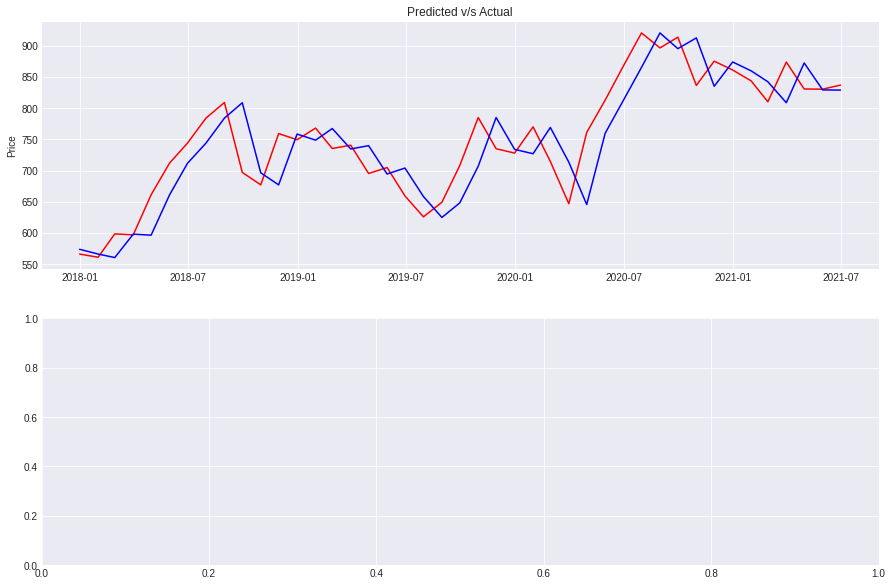

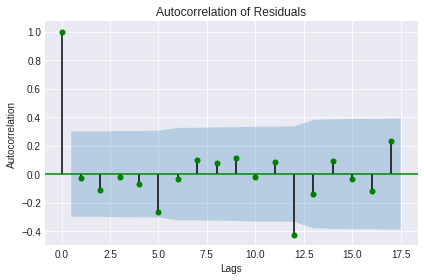

In [43]:
# Call model_performance to evaluate the performance
model_performance(df_AR['Mcap'].iloc[train_test_window:],df_AR['Pred'].iloc[train_test_window:])

In [44]:
type(df['Mcap'].iloc[train_test_window:])

pandas.core.series.Series

#### Create a trading strategy using AR(1) model on df_AR

What are we trying to do in the strategy:
- Create Signal - When the price is higher than previous day, create a signal +1, or -1 if not.
- Signal implies the direction for the returns.
- Strategy returns- Creating a hypothetical return (Pred return), in case the position was held throughout the tennure. 

In [45]:
# Create a column with returns mom
df_AR['Return'] = df_AR['Mcap'].pct_change()

# Create a signal
""" When the price is greater than previous price, say 1, otherwise -1.
"""
# Long Short Strategy
df_AR['Signal'] = np.where(df_AR['Pred'].shift(1)< df_AR['Pred'], 1,-1)
df_AR['Pred return'] = df_AR['Signal'].shift(1)*df_AR['Return']

# Create a long only strategy with negative moves not participated into
df_AR['Signal_long'] = np.where(df_AR['Pred'].shift(1)< df_AR['Pred'], 1,0)
df_AR['Pred return long'] = df_AR['Signal_long'].shift(1)*df_AR['Return']

df_AR.tail()

,Value,Mcap,Pred,Return,Signal,Pred return,Signal_long,Pred return long
Date,,,,,,,,
2021-02-28,43.23,810.18,842.33,-0.039741,-1,0.039741,0,-0.000000
2021-03-31,46.89,873.89,808.74,0.078637,-1,-0.078637,0,0.000000
2021-04-30,44.57,830.71,872.48,-0.049411,1,0.049411,1,-0.000000
2021-05-31,44.55,830.44,829.22,-0.000325,-1,-0.000325,0,-0.000325
2021-06-30,44.90,836.97,828.96,0.007863,-1,-0.007863,0,0.000000


In [46]:
# Define a function to analyse the returns

def analyse_strategy(return_series):
  """ Takes the Returns column as input and performs few calculations
  Sharpe ratio- Return to risk ratio
  Cumulative return - Month over month return calculated
  Drawdown calculation
  Print statistics
  """
  sharpe_ratio = return_series.mean()/return_series.std()*np.sqrt(252)

  #Cumulative Returns
  cum_return = (return_series+1).cumprod()

  print('The Sharpe Ratio is %.2f' % sharpe_ratio)
  print('The cumulative return is %.2f' % (((cum_return[-1])-1)*100) + "%") 
  print('The std dev is: ', return_series.std())
  
  # Plots
  labels = return_series.index
  plt.figure(figsize=(15,10))

  #Plot strategy return
  plt.plot(cum_return, color = 'b')
  plt.title('Cumulative returns', fontsize=14)
  plt.ylabel('Cumulative Return')
  plt.xlabel('Date')
  


The Sharpe Ratio is -0.88
The cumulative return is -22.48%
The std dev is:  0.06622900591149163


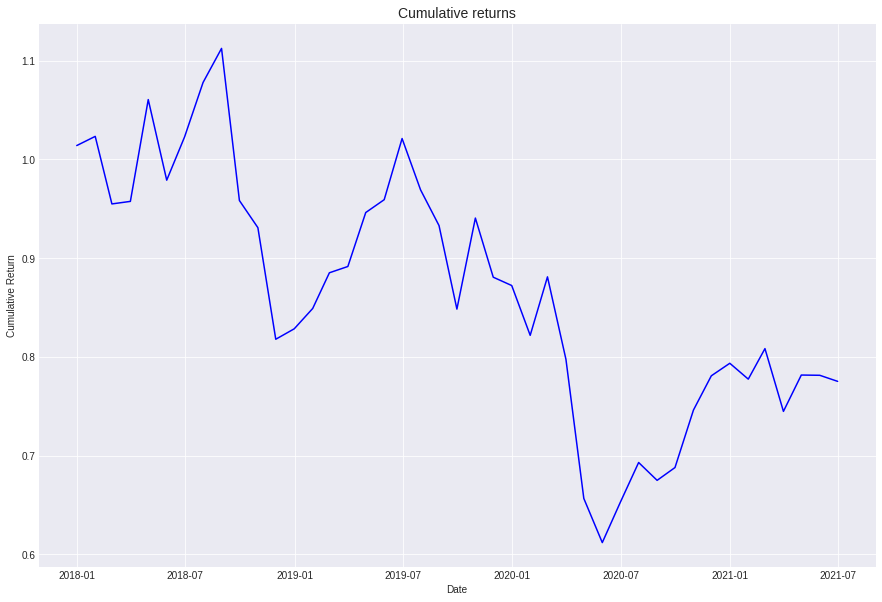

In [47]:
# Call the analyse_strategy function over Pred return (Return generated by Predicted values)

analyse_strategy(df_AR['Pred return'].iloc[train_test_window:])

The Sharpe Ratio is 1.33
The cumulative return is 12.18%
The std dev is:  0.04288743790147641


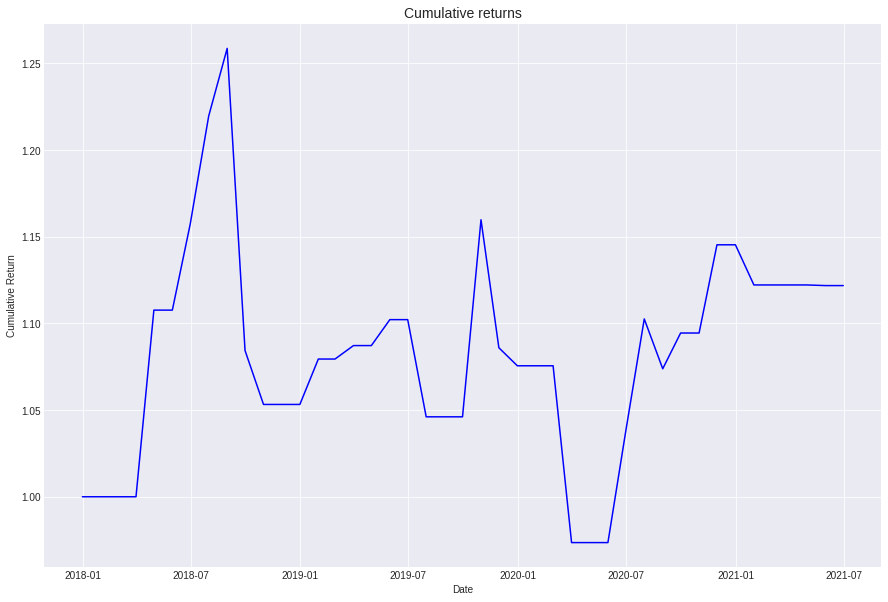

In [48]:
analyse_strategy(df_AR['Pred return long'].iloc[train_test_window:])

## AR(p): Auto-Regressive model with order p.
We can use more than 1 lagged term (order of AR mdoel), denoted by p.
- Create seperate df_ARp to start this analysis (copy from df).
- All the terms are similar i.e. 75% train data.
- Find the lag period (PACF plot)
- Train your model at p lags
- Modify the existing function to take 2 variables (series and Lags)
- Evaluate the Model performance
- Create Trading strategy

In [49]:
df_ARp = df.copy()
df_ARp.head()

,Value,Mcap
Date,,
2007-04-30,28.69,30.17
2007-05-31,34.69,36.47
2007-06-30,35.79,37.62
2007-07-31,38.73,40.72
2007-08-31,35.59,37.42


In [50]:
train_window= int(len(df_ARp)*.70)

Text(0.5, 1.0, 'Partial Autocorrelation')

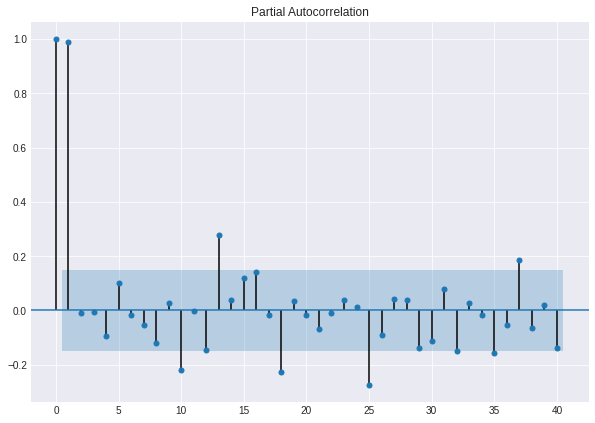

In [56]:
# plot Pacf to find the no of lags.
fig,ax = plt.subplots(figsize=(10,7))
sgt.plot_pacf(df_ARp['Mcap'], lags = 40, ax = ax)
plt.title('Partial Autocorrelation')

Since we see that the lags @ (1,10,13,18) are significant, we will define a function to input the lag variable to determine the outcome of the ARp.
- A higher lag will lead to overfitting
- Lower lag will lead to underfitting


In [52]:
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)

### Define a function

In [54]:
# Define a function to take the train dataset and no of lags to give forecast.
def predict_price_ARp(series,lag):
  """ The function will use ARIM model to predict price of 1 day"""
  # Define model
  model = ARIMA(series, order = (lag,0,0))

  # Fit the model
  model_fit = model.fit(disp=0)

  # Make Forecast
  forecast = model_fit.forecast()

  return forecast[0][0]


In [57]:
df_ARp['Pred'] = df_ARp['Mcap'].rolling(train_window).apply(predict_price_ARp, args=(10,)).round(2)
df_ARp['Pred'] = df_ARp['Pred'].shift(1)

/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:492: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:492: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:492: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
/usr/local/lib/pyt

In [58]:
print(df_ARp.tail(),'\n\n',df.tail())

            Value    Mcap    Pred
Date                             
2021-02-28  43.23  810.18  874.13
2021-03-31  46.89  873.89  817.16
2021-04-30  44.57  830.71  882.16
2021-05-31  44.55  830.44  814.46
2021-06-30  44.90  836.97  830.34 

             Value    Mcap
Date                     
2021-02-28  43.23  810.18
2021-03-31  46.89  873.89
2021-04-30  44.57  830.71
2021-05-31  44.55  830.44
2021-06-30  44.90  836.97


### Evaluate the model

The Mean Absolute Error is:  41.03
The Mean Squared Error is:  2615.66
The RMSE is:  51.14
The Mean Absolute Error percentage is:  5.764421292613874


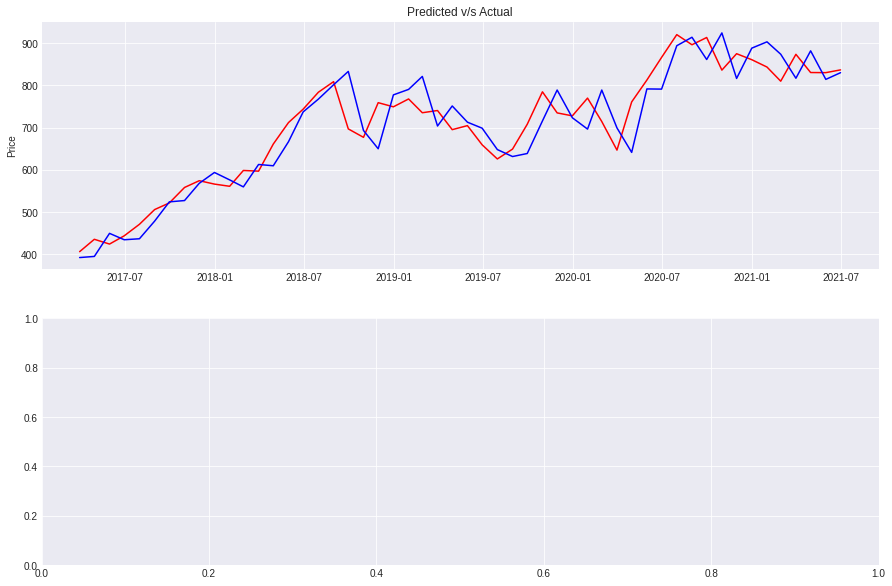

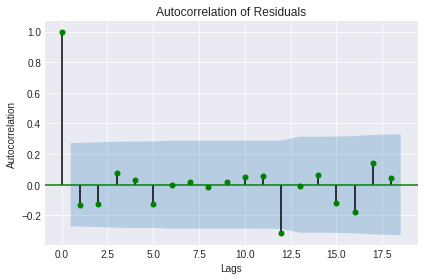

In [59]:
# Call model performance function
# Call model_performance to evaluate the performance
model_performance(df_ARp['Mcap'].iloc[train_window:],df_ARp['Pred'].iloc[train_window:])


### Create a strategy

In [60]:
# Create a column with returns mom
df_ARp['Return'] = df_ARp['Mcap'].pct_change()

# Create a signal
""" When the price is greater than previous price, say 1, otherwise -1.
"""
# Long Short Strategy
df_ARp['Signal'] = np.where(df_ARp['Pred'].shift(1)< df_ARp['Pred'], 1,-1)
df_ARp['Pred return'] = df_ARp['Signal'].shift(1)*df_ARp['Return']

# Create a long only strategy with negative moves not participated into
df_ARp['Signal_long'] = np.where(df_ARp['Pred'].shift(1)< df_ARp['Pred'], 1,0)
df_ARp['Pred return long'] = df_ARp['Signal_long'].shift(1)*df_ARp['Return']

df_ARp.tail()

,Value,Mcap,Pred,Return,Signal,Pred return,Signal_long,Pred return long
Date,,,,,,,,
2021-02-28,43.23,810.18,874.13,-0.039741,-1,-0.039741,0,-0.039741
2021-03-31,46.89,873.89,817.16,0.078637,-1,-0.078637,0,0.000000
2021-04-30,44.57,830.71,882.16,-0.049411,1,0.049411,1,-0.000000
2021-05-31,44.55,830.44,814.46,-0.000325,-1,-0.000325,0,-0.000325
2021-06-30,44.90,836.97,830.34,0.007863,1,-0.007863,1,0.000000


The Sharpe Ratio is -1.67
The cumulative return is -36.78%
The std dev is:  0.06398235457656153


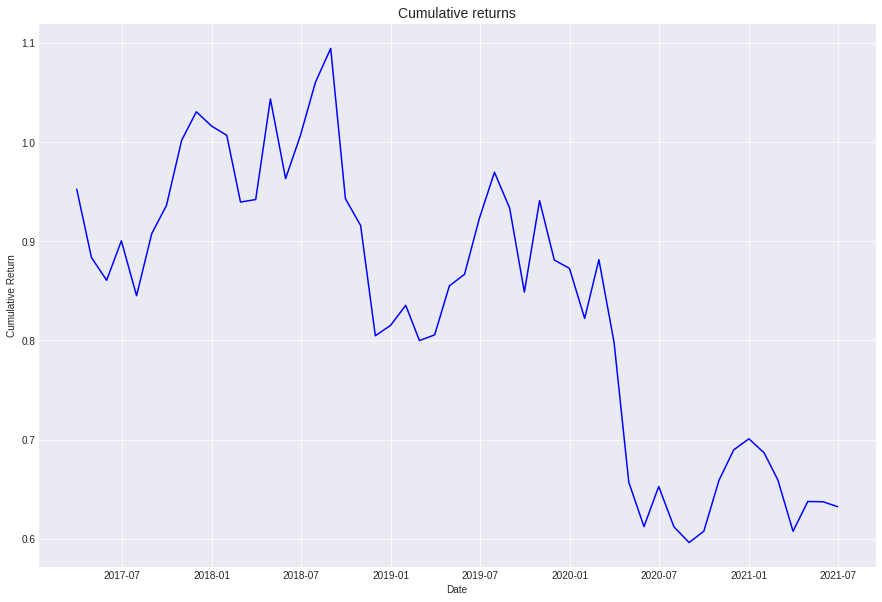

In [62]:
# Call the analyse_strategy function over Pred return (Return generated by Predicted values)

analyse_strategy(df_ARp['Pred return'].iloc[train_window:])

The Sharpe Ratio is 1.92
The cumulative return is 24.20%
The std dev is:  0.04171308376982242


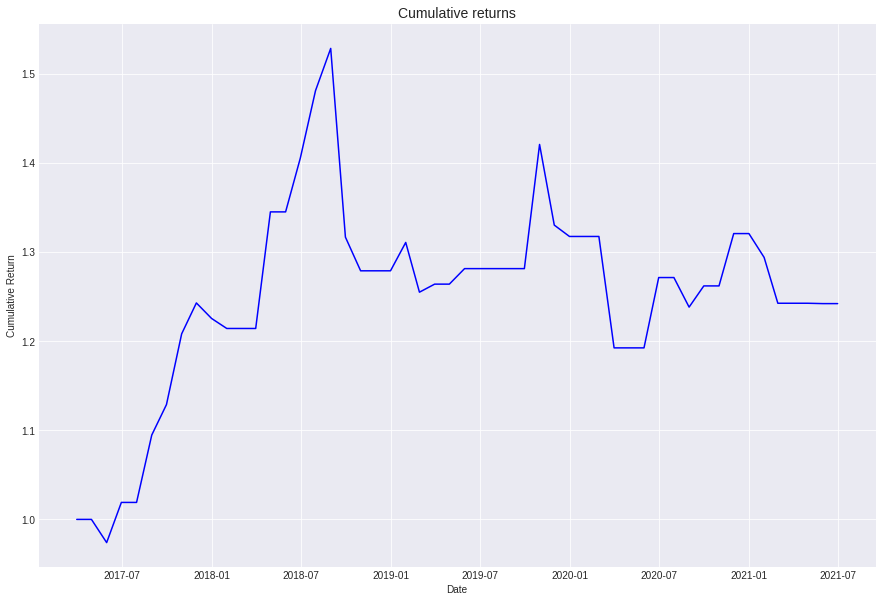

In [63]:
analyse_strategy(df_ARp['Pred return long'].iloc[train_window:])

# Moving Average (MA)

In [65]:
# Create a function to calculate moving averages
def moving_average(series,n):
  """
  Calculate the average of last n observations
  """
  return np.average(series[-n:])


### Simple Moving Average

In [67]:
print('The moving average of the PE for the last 12 months: ',moving_average(df['Value'],12))


The moving average of the PE for the last 12 months:  47.39416666666667


## Plot Moving Average

In [68]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

In [69]:
def plot_MA(series, window, plot_intervals=False, scale= 1.96, plot_anomalies=False):
  """
    series - dataframe with time series
    window - rolling mean window size
    plot_intervals - show confidence intervals
    plot_anomalies - show anomalies 
        
    scale - 1.96 is the approximate value of the 97.5 percentile point of the standard normal distribution. 
        95% of the area under a normal curve
  """
  rolling_mean = series.rolling(window=window).mean()

  plt.figure(figsize=(15, 5))
  plt.title("Moving average\n window size = {}".format(window))
  plt.plot(rolling_mean, "g", label="Rolling mean trend")

  """
    In case plot_intervals is chosen as True 
  """

  # Plot confidence intervals:
  if plot_intervals:
    mae = mean_absolute_error(series[window:], rolling_mean[window:])
    deviation = np.std(series[window:]- rolling_mean[window:])
    lower_bond = rolling_mean - (mae+scale*deviation)
    upper_bond = rolling_mean + (mae+scale*deviation)
    plt.plot(upper_bond, "r--", label="Upper Bond / Lower Bond")
    plt.plot(lower_bond, "r--")
    

  plt.plot(series[window:], label ='Actual Values')
  plt.legend(loc = 'upper left')
  plt.grid(True)

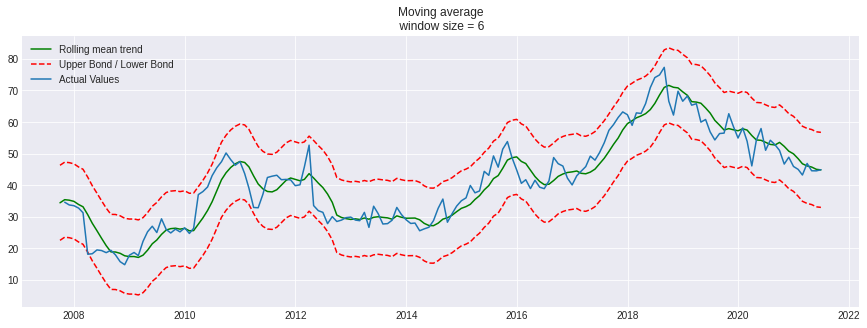

In [71]:
plot_MA(df['Value'],6, plot_intervals=True)

# ARIMA model (under progress)
Now we have done following things right:
1. Since the original seires is not stationary, we will use differencing quotient as (d); degree =1
2. AR quotient; Significant quotients from PACF plot; PACF = 96
3. MA quotient; Significant quotients from ACF plot; ACF = 13

In [ ]:
# Import package
from statsmodels.tsa.arima_model import ARIMA

In [ ]:
# Divide the data from the original dataframe
X = df_diff['Value']

# Create Train and Test 
train = X[:153]
test = X[153:]

# Verify if the size is created properly
print('Train size:',len(train))
print('Test size:', len(test))


# Create a list for predictions
pred = []

In [ ]:
adfuller_test(train)

In [ ]:
#model_arima = ARIMA(train, order=(96,1,13)).fit()


In [ ]:
pred_arima = model_arima.forecast(steps = 18)[0]
print(pred_arima)#.shape, pred_arima)

In [ ]:
plt.plot(test)
plt.show()
plt.plot(pred_arima,color='green')

In [ ]:
print(model_arima.aic)